In [1]:
#Micael Fernando Broggio
#Tutoria - Data Science Academy
#Test machine learning Kaggle
#2022 july 28
#data (https://www.kaggle.com/uciml/pima-indians-diabetes-database/data)

## Exploração e preparação dos dados

In [2]:
#import dos frameworks necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#importa dados csv
df = pd.read_csv("pima-data.csv")

In [4]:
#apresenta cabeçalho de dados e primeiras linhas
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
#cheque analise de presença de dados nan
df.isnull().values.any()

False

In [6]:
#cria funcao para plotar mapa de calor com dados de correlacao
def heatmapCorr(table_df):
    corrMatrix = table_df.corr()
    RdBu_r = plt.cm.get_cmap('RdBu')
    RdBu_r = RdBu_r.reversed()
    plt.imshow(corrMatrix, cmap=RdBu_r , interpolation='nearest')
    plt.colorbar()
    plt.clim(-1,1)
    plt.xticks(range(len(corrMatrix.columns)),corrMatrix.columns,rotation='vertical')
    plt.yticks(range(len(corrMatrix.columns)),corrMatrix.columns)

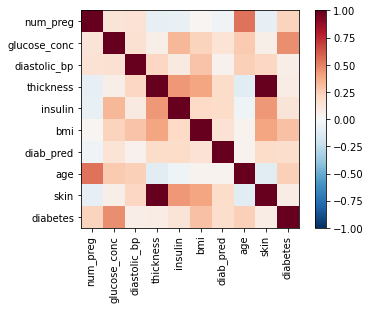

In [7]:
#aplica a funcao criada acima
heatmapCorr(df)

In [8]:
#cria dicionario para mapear true e falses por 1 e 0
diabetes_map = {True : 1, False : 0}

In [9]:
#aplica o mapeamento criado anteriormente
df['diabetes']=df['diabetes'].map(diabetes_map)
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [10]:
#distribubiçao de casos positivos e negativos
positivos = len(df.loc[df['diabetes']==1])
negativos = len(df.loc[df['diabetes']==0])
print("Casos Positivos: {0} ({1:2.2f}%)" .format(positivos, positivos*100/len(df)))
print("Casos Negativos: {0} ({1:2.2f}%)" .format(negativos, negativos*100/len(df)))

Casos Positivos: 268 (34.90%)
Casos Negativos: 500 (65.10%)


In [11]:
#import train_teste_split
from sklearn.model_selection import train_test_split

In [12]:
#criando objetos com atributos uteis
x = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']].values
y = df[['diabetes']].values

In [13]:
#realizando split nos dados para divisao entre treino e teste
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
#analisando distribuição de dados de treino e teste
infoTreino = len(yTreino)
infoTeste  = len(yTeste)
print("n treino: {0} ({1:2.2f}%)" .format(infoTreino, infoTreino*100/len(df)))
print("n teste : {0} ({1:2.2f}%)" .format(infoTeste, infoTeste*100/len(df)))

n treino: 537 (69.92%)
n teste : 231 (30.08%)


In [15]:
#analisando distribuição de dados de treino e teste
positivosTreino = len(yTreino[yTreino[:]==1])
negativosTreino = len(yTreino[yTreino[:]==0])
print("Casos Positivos Treino: {0} ({1:2.2f}%)" .format(positivosTreino, positivosTreino*100/len(yTreino)))
print("Casos Negativos Treino: {0} ({1:2.2f}%)" .format(negativosTreino, negativosTreino*100/len(yTreino)))
print("")
positivosTeste = len(yTeste[yTeste[:]==1])
negativosTeste = len(yTeste[yTeste[:]==0])
print("Casos Positivos Teste: {0} ({1:2.2f}%)" .format(positivosTeste, positivosTeste*100/len(yTeste)))
print("Casos Negativos Teste: {0} ({1:2.2f}%)" .format(negativosTeste, negativosTeste*100/len(yTeste)))

Casos Positivos Treino: 188 (35.01%)
Casos Negativos Treino: 349 (64.99%)

Casos Positivos Teste: 80 (34.63%)
Casos Negativos Teste: 151 (65.37%)


In [16]:
#analisando missing ocultos
print("n glucose_conc missing values: {0}" .format(len(df.loc[df['glucose_conc']==0])))
print("n diastolic_bp missing values: {0}" .format(len(df.loc[df['diastolic_bp']==0])))
print("n thickness missing values: {0}"    .format(len(df.loc[df['thickness']==0])))
print("n insulinc missing values: {0}"     .format(len(df.loc[df['insulin']==0])))
print("n bmi missing values: {0}"          .format(len(df.loc[df['bmi']==0])))
print("n diab_pred missing values: {0}"    .format(len(df.loc[df['diab_pred']==0])))
print("n age missing values: {0}"          .format(len(df.loc[df['age']==0])))

n glucose_conc missing values: 5
n diastolic_bp missing values: 35
n thickness missing values: 227
n insulinc missing values: 374
n bmi missing values: 11
n diab_pred missing values: 0
n age missing values: 0


## Treinando o modelo - Naive Bayes

In [17]:
#importa função imputer do sklearn
from sklearn.impute import SimpleImputer

In [18]:
#aplica os valores medios de cada coluna sobre os valores missings ocultos
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
xTreino = imp_mean.fit_transform(xTreino)
xTeste  = imp_mean.fit_transform(xTeste)

In [19]:
#import modelo de classificação Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [20]:
#treinando o modelo
mod_v1 = GaussianNB()
mod_v1.fit(xTreino,yTreino.ravel())

GaussianNB()

## Avaliando o treinamento

In [21]:
#importa o pacote metrics do sklearn
from sklearn import metrics

In [22]:
#avaliando a partir do accuracy_score
modV1_predict_train = mod_v1.predict(xTreino)
print("Accuracy-score: {0:.4f}" .format(metrics.accuracy_score(yTreino, modV1_predict_train)))

Accuracy-score: 0.7542


## Avaliando o teste e suas métricas

In [23]:
#avaliando a partir do accuracy_score
modV1_predict_test = mod_v1.predict(xTeste)
print("Accuracy-score: {0:.4f}" .format(metrics.accuracy_score(yTeste, modV1_predict_test)))

Accuracy-score: 0.7359


In [24]:
#importando matriz de confusão
from IPython.display import Image
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

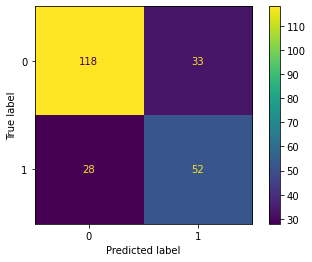

In [25]:
#aplicando matriz de confusão
myConfusionMatrix = metrics.confusion_matrix(yTeste,modV1_predict_test, labels=mod_v1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=myConfusionMatrix,
                              display_labels=mod_v1.classes_)
disp.plot()

In [26]:
#aplicando classification report
print("Classification Report")
print(metrics.classification_report(yTeste,modV1_predict_test,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Treinando o modelo - Randon Forest (conjunto de arvores de decisão) 

In [27]:
#import modelo de classificação Random Forest
from sklearn.ensemble import RandomForestClassifier

In [28]:
#treinando o modelo
mod_v2 = RandomForestClassifier(random_state=42)
mod_v2.fit(xTreino,yTreino.ravel())

RandomForestClassifier(random_state=42)

## Avaliando o treinamento

In [29]:
#avaliando a partir do accuracy_score
modV2_predict_train = mod_v2.predict(xTreino)
print("Accuracy-score: {0:.4f}" .format(metrics.accuracy_score(yTreino, modV2_predict_train)))

Accuracy-score: 1.0000


## Avaliando o teste e suas métricas

In [30]:
#avaliando a partir do accuracy_score
modV2_predict_test = mod_v2.predict(xTeste)
print("Accuracy-score: {0:.4f}" .format(metrics.accuracy_score(yTeste, modV2_predict_test)))

Accuracy-score: 0.7403


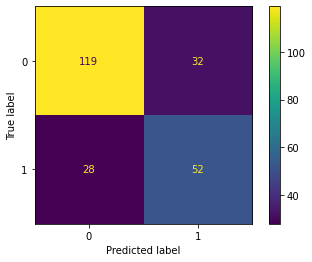

In [31]:
#aplicando matriz de confusão
myConfusionMatrix = metrics.confusion_matrix(yTeste,modV2_predict_test, labels=mod_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=myConfusionMatrix,
                              display_labels=mod_v2.classes_)
disp.plot()

In [32]:
#aplicando classification report
print("Classification Report")
print(metrics.classification_report(yTeste,modV2_predict_test,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Treinando o modelo - Regressão Logística

In [44]:
#import modelo de classificação Regressão Logística
from sklearn.linear_model import LogisticRegression

In [53]:
#treinando o modelo
mod_v3= LogisticRegression(C = 0.7,max_iter=180,random_state=42)
mod_v3.fit(xTreino,yTreino.ravel())

LogisticRegression(C=0.7, max_iter=180, random_state=42)

## Avaliando o teste e suas métricas

In [54]:
#avaliando a partir do accuracy_score
modV3_predict_test = mod_v3.predict(xTeste)
print("Accuracy-score: {0:.4f}" .format(metrics.accuracy_score(yTeste, modV3_predict_test)))

Accuracy-score: 0.7359


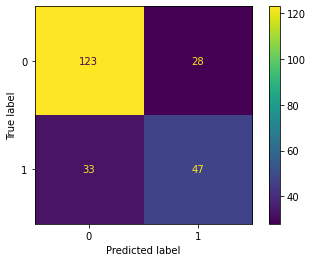

In [55]:
#aplicando matriz de confusão
myConfusionMatrix = metrics.confusion_matrix(yTeste,modV3_predict_test, labels=mod_v3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=myConfusionMatrix,
                              display_labels=mod_v3.classes_)
disp.plot()

In [56]:
#aplicando classification report
print("Classification Report")
print(metrics.classification_report(yTeste,modV3_predict_test,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



## Save do modelo preditivo escolhido - Modelo V2 - Randon Forest

In [58]:
#importando pickle
import pickle

In [60]:
#usando pickle para salvar o modelo
filename = 'modelo_treinado_v2_RandonForest.sav'
pickle.dump(mod_v2,open(filename,'wb'))

## Realizando previsões com o modelo

In [80]:
#fazendo previsões como o modelo preditivo
loaded_model = pickle.load(open(filename, 'rb'))
print("Previsão de indivíduos com Diabetes")
print("--------")

result1 = loaded_model.predict([xTeste[110]])
print("indivíduo 111: {0}" .format(result1))
result2 = loaded_model.predict([xTeste[200]])
print("indivíduo 201: {0}" .format(result2))
result3 = loaded_model.predict([xTeste[18]])
print("indivíduo 19: {0}" .format(result3))
result4 = loaded_model.predict([xTeste[75]])
print("indivíduo 76: {0}" .format(result4))


Previsão de indivíduos com Diabetes
--------
indivíduo 111: [0]
indivíduo 201: [0]
indivíduo 19: [1]
indivíduo 76: [1]
